# Exploratory data analysis
### This notebook includes general information about the dataset, exploratory data analysis, and visualizations.

#### 1. Import Libraries

In [1]:

import os
os.chdir(r"C:\Users\arda\Desktop\My All Projects\brain_tumor_classification")

import pandas as pd
import matplotlib.pyplot as plt
from src.data_loading import load_data
from src.visualization import visualize_image,visualize_images_by_label,display_pixel_intensity,display_image_properties,visualize_class_distribution
from src.utils import convert_to_grayscale,apply_threshold,apply_dilation,detect_and_draw_keypoints,adaptive_histogram_equalization
from src.data_loading import get_random_image
from src.utils import apply_histogram_equalization_to_folder,analyze_pixel_values,pixel_intensity_stats



#### 2. Examine the metadata file

In [4]:
metadata = pd.read_csv("C:\\Users\\arda\\Desktop\\My All Projects\\brain_tumor_classification\\data\\raw\\metadata.csv")
metadata

,Unnamed: 0,image,class,format,mode,shape
0,0,Cancer (1).jpg,tumor,JPEG,RGB,"(512, 512, 3)"
1,1,Cancer (1).png,tumor,PNG,L,"(300, 240)"
2,2,Cancer (1).tif,tumor,TIFF,RGB,"(256, 256, 3)"
3,3,Cancer (10).jpg,tumor,JPEG,RGB,"(512, 512, 3)"
4,4,Cancer (10).tif,tumor,TIFF,RGB,"(256, 256, 3)"
...,...,...,...,...,...,...
4595,4595,Not Cancer (995).jpg,normal,JPEG,RGB,"(168, 300, 3)"
4596,4596,Not Cancer (996).jpg,normal,JPEG,RGB,"(509, 452, 3)"
4597,4597,Not Cancer (997).jpg,normal,JPEG,RGB,"(197, 177, 3)"
4598,4598,Not Cancer (998).jpg,normal,JPEG,RGB,"(217, 232, 3)"


In [5]:
metadata.drop("Unnamed: 0", axis=1,inplace=True)
metadata 

,image,class,format,mode,shape
0,Cancer (1).jpg,tumor,JPEG,RGB,"(512, 512, 3)"
1,Cancer (1).png,tumor,PNG,L,"(300, 240)"
2,Cancer (1).tif,tumor,TIFF,RGB,"(256, 256, 3)"
3,Cancer (10).jpg,tumor,JPEG,RGB,"(512, 512, 3)"
4,Cancer (10).tif,tumor,TIFF,RGB,"(256, 256, 3)"
...,...,...,...,...,...
4595,Not Cancer (995).jpg,normal,JPEG,RGB,"(168, 300, 3)"
4596,Not Cancer (996).jpg,normal,JPEG,RGB,"(509, 452, 3)"
4597,Not Cancer (997).jpg,normal,JPEG,RGB,"(197, 177, 3)"
4598,Not Cancer (998).jpg,normal,JPEG,RGB,"(217, 232, 3)"


In [6]:
metadata[metadata["class"]=="normal"]

,image,class,format,mode,shape
2513,Not Cancer (1).jpeg,normal,JPEG,L,"(630, 630)"
2514,Not Cancer (1).jpg,normal,JPEG,RGB,"(350, 350, 3)"
2515,Not Cancer (1).png,normal,PNG,RGB,"(1080, 1920, 3)"
2516,Not Cancer (10).jpg,normal,JPEG,RGB,"(630, 630, 3)"
2517,Not Cancer (100).jpg,normal,JPEG,RGB,"(290, 236, 3)"
...,...,...,...,...,...
4595,Not Cancer (995).jpg,normal,JPEG,RGB,"(168, 300, 3)"
4596,Not Cancer (996).jpg,normal,JPEG,RGB,"(509, 452, 3)"
4597,Not Cancer (997).jpg,normal,JPEG,RGB,"(197, 177, 3)"
4598,Not Cancer (998).jpg,normal,JPEG,RGB,"(217, 232, 3)"


In [7]:
metadata["class"].unique()

array(['tumor', 'normal'], dtype=object)

In [8]:
metadata["mode"].unique()

array(['RGB', 'L', 'RGBA', 'P'], dtype=object)

In [9]:
metadata["format"].unique()

array(['JPEG', 'PNG', 'TIFF'], dtype=object)

In [10]:
metadata.isnull().sum()

image     0
class     0
format    0
mode      0
shape     0
dtype: int64

#### 3. Overview of the Dataset

#### Load Dataset

In [2]:
data_dir = r"C:\Users\arda\Desktop\My All Projects\brain_tumor_classification\data\raw\Brain Tumor Data Set"

train_data, validation_data = load_data(data_dir,img_size=None)
train_data_resized, validation_data_resized = load_data(data_dir)

Found 3681 images belonging to 2 classes.
Found 919 images belonging to 2 classes.
Found 3681 images belonging to 2 classes.
Found 919 images belonging to 2 classes.


#### Balance of classes

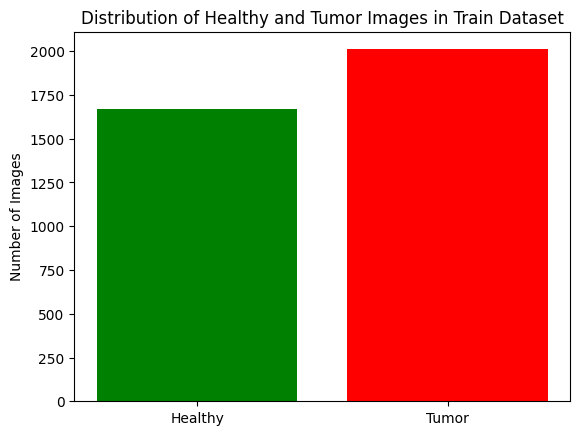

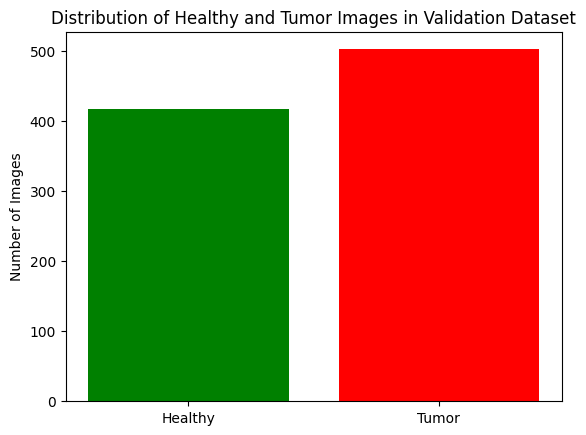

In [12]:
visualize_class_distribution(train_data_resized)
visualize_class_distribution(validation_data_resized)

#### Images Dimension Analysis


Category: Brain Tumor
Total Images Analyzed: 2427
Average Height: 439.26328800988875
Average Width: 408.0766378244747
Color Channels (3=RGB, 1=Grayscale): {3}


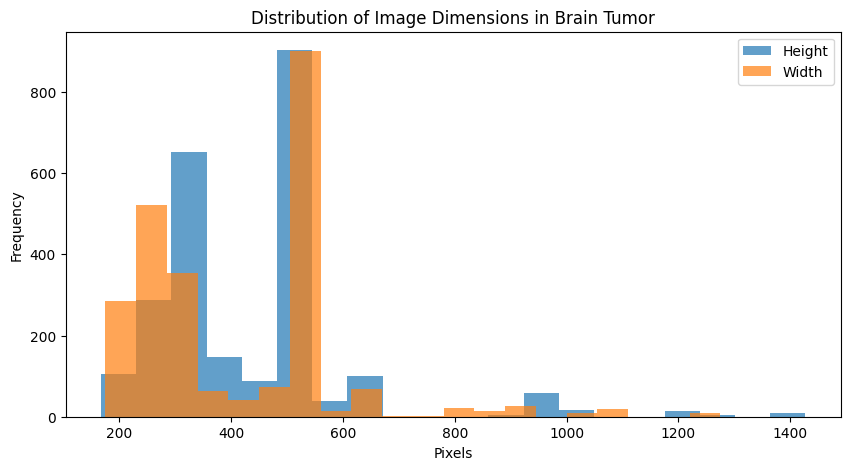


Category: Healthy
Total Images Analyzed: 2087
Average Height: 313.2587446094873
Average Width: 307.24916147580257
Color Channels (3=RGB, 1=Grayscale): {3}


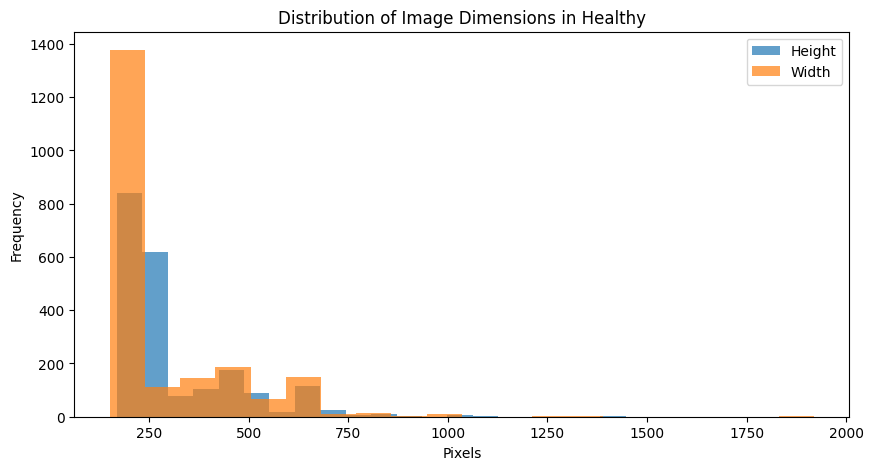

In [13]:
display_image_properties(data_dir)

#### Pixel Intensity Analysis

c:\Users\arda\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


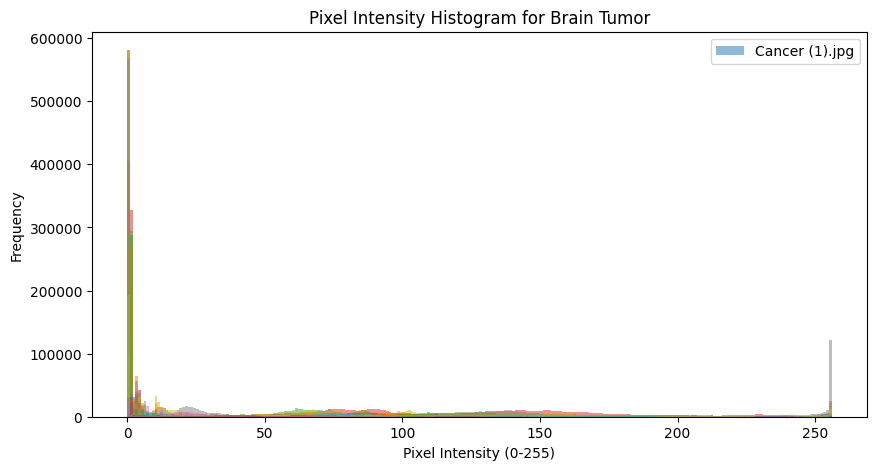

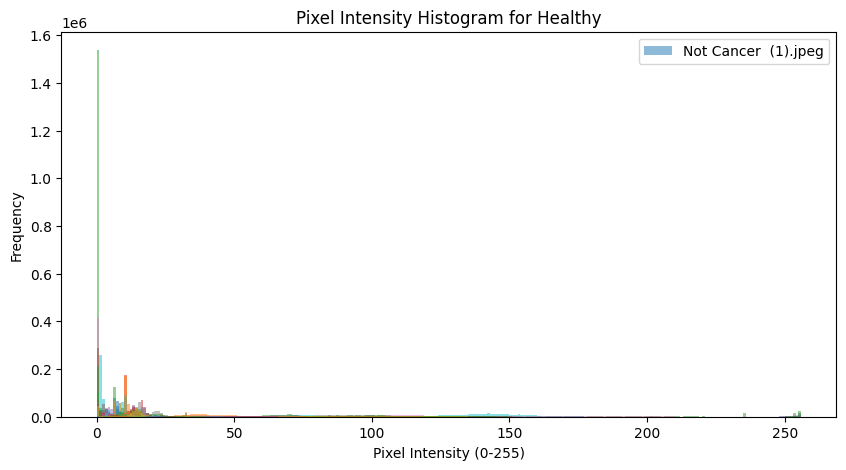

In [14]:
display_pixel_intensity(data_dir)

#### Pixel Intensity Statisctics

In [15]:
pixel_intensity_stats(data_dir)


Category: Brain Tumor
Mean: 58.35
Median: 43.00
Std Deviation: 64.97
Min: 0.00
Max: 255.00

Category: Healthy
Mean: 57.55
Median: 30.00
Std Deviation: 63.82
Min: 0.00
Max: 255.00


#### Statistical Analysis of Pixel Intensity Differences Between Brain Tumor and Healthy Images

In [16]:
analyze_pixel_values(data_dir)

Brain Tumor Normality Test: Failed
Healthy Normality Test: Failed

Mann-Whitney U Test Results:
U-statistic: 2622320.0000, p-value: 0.0398

There is a statistically significant difference between the two categories.


### 4. Data Visualizations

#### Some sample of images

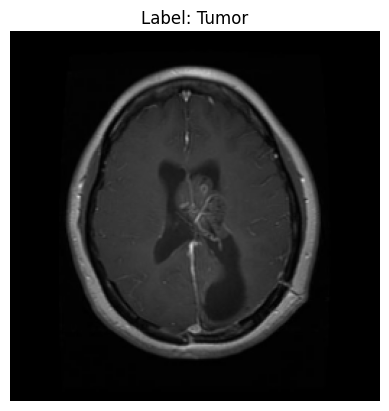

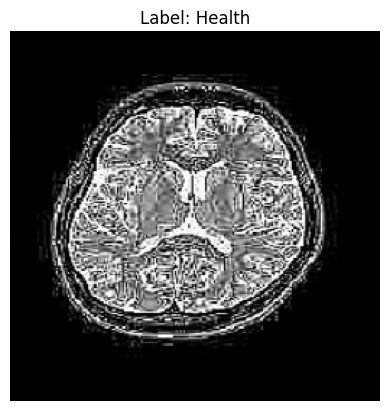

In [17]:
visualize_image(train_data,label="Tumor")
visualize_image(train_data,label="Health")

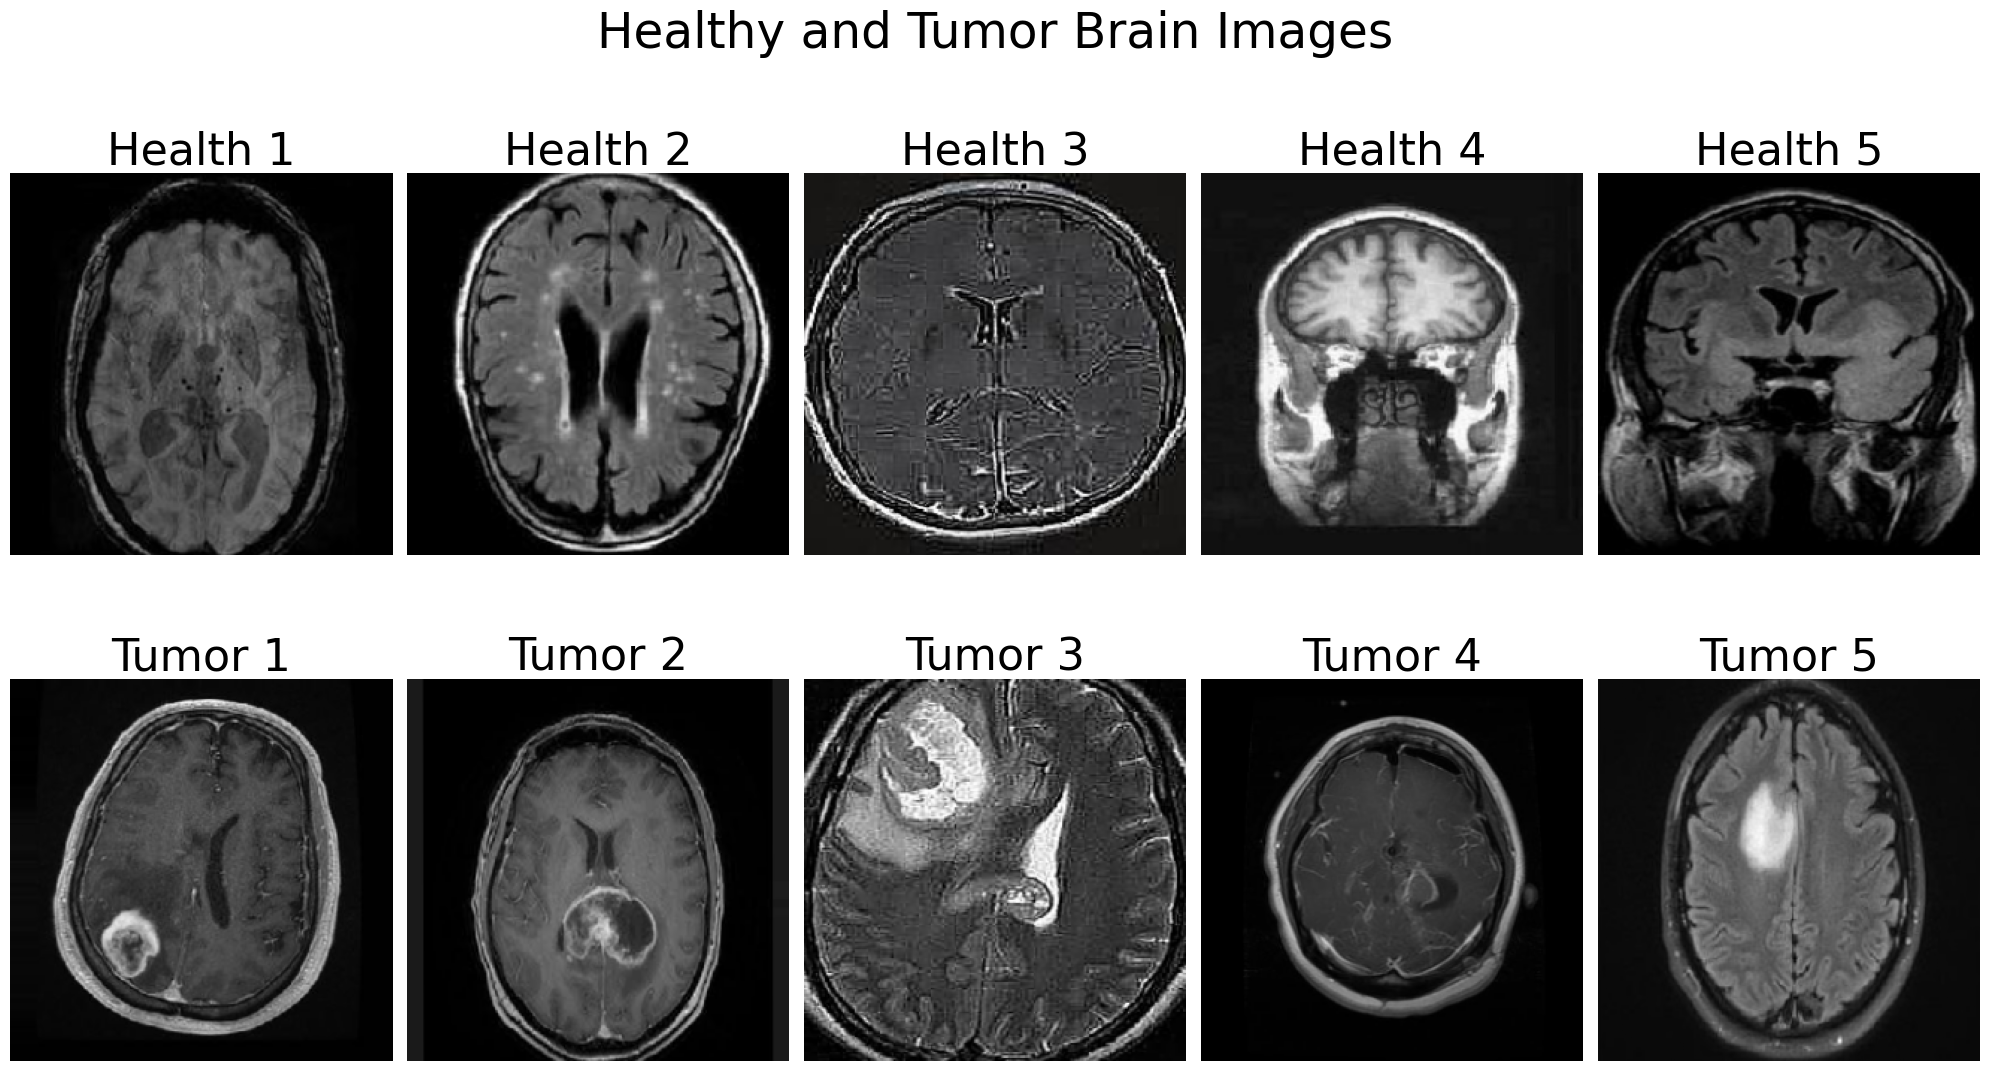

In [3]:
visualize_images_by_label(train_data,5)

#### An example image with different image processing techniques applied

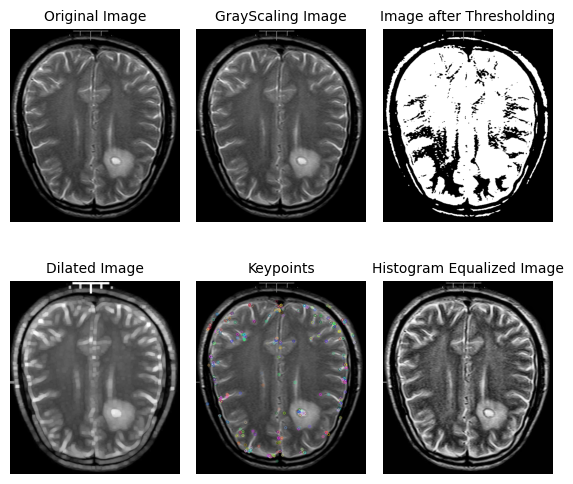

In [37]:
data_dir = r"C:\Users\arda\Desktop\My All Projects\brain_tumor_classification\data\raw\Brain Tumor Data Set"

image = get_random_image(data_dir=data_dir)

plt.figure(figsize=(7, 6))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image", fontsize=10)
plt.axis("off")

gray_image = convert_to_grayscale(image)
plt.subplot(2, 3, 2)
plt.imshow(gray_image, cmap='gray')
plt.title("GrayScaling Image", fontsize=10)
plt.axis("off")

thresh_image = apply_threshold(gray_image)
plt.subplot(2, 3, 3)
plt.imshow(thresh_image, cmap='gray')
plt.title("Image after Thresholding", fontsize=10)
plt.axis("off")


dilated_image = apply_dilation(gray_image)
plt.subplot(2, 3, 4)
plt.imshow(dilated_image,cmap="gray")
plt.title("Dilated Image", fontsize=10)
plt.axis("off")

image_with_keypoints = detect_and_draw_keypoints(gray_image)
plt.subplot(2, 3, 5)
plt.imshow(image_with_keypoints)
plt.title("Keypoints", fontsize=10)
plt.axis("off")


equalized_image = adaptive_histogram_equalization(gray_image)
plt.subplot(2, 3, 6)
plt.imshow(equalized_image,cmap="gray")
plt.title("Histogram Equalized Image", fontsize=10)
plt.axis("off")
plt.subplots_adjust(wspace=0.1, hspace=0.2)
plt.show()

#### I will apply histogram equalization method to all images and see its effect on the success of the models.

In [2]:
folder_path_tumor = r"C:\Users\arda\Desktop\My All Projects\brain_tumor_classification\data\raw\Brain Tumor Data Set\Brain Tumor"  
output_folder_tumor = r"C:\Users\arda\Desktop\My All Projects\brain_tumor_classification\data\processed\Brain Tumor"  
folder_path_healthy = r"C:\Users\arda\Desktop\My All Projects\brain_tumor_classification\data\raw\Brain Tumor Data Set\Healthy"
output_folder_healthy = r"C:\Users\arda\Desktop\My All Projects\brain_tumor_classification\data\processed\Healthy"  

apply_histogram_equalization_to_folder(folder_path_tumor, output_folder_tumor)
apply_histogram_equalization_to_folder(folder_path_healthy, output_folder_healthy)